<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/scatter_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pylab as pl
import numpy as np
%pylab inline
import pandas as pd
from astropy import constants as const
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


In [5]:
pl.rcParams['axes.facecolor']= 'F1F1F1'
pl.rcParams['figure.facecolor']= 'F1F1F1'
pl.rcParams['figure.edgecolor']= 'F1F1F1'
pl.rcParams['savefig.facecolor']= 'F1F1F1'
pl.rcParams['savefig.edgecolor']= 'F1F1F1'

pl.rcParams['axes.labelcolor']= 'k'

pl.rcParams['xtick.direction']= 'in'
pl.rcParams['ytick.direction']= 'in'
pl.rcParams['xtick.color']= 'k'
pl.rcParams['ytick.color']= 'k'
pl.rcParams['axes.axisbelow']= True
pl.rcParams['grid.linestyle']= '-'

pl.rcParams['text.color']= 'k'

pl.rcParams['font.size']= 20

pl.rcParams['xtick.labelsize']= 'large'
pl.rcParams['ytick.labelsize']= 'large'
pl.rcParams['lines.solid_capstyle']= 'round'
pl.rcParams['patch.edgecolor']= 'w'
pl.rcParams['patch.force_edgecolor']= True

pl.rcParams['image.cmap']= 'viridis'
pl.rcParams['image.interpolation']= 'nearest'

pl.rcParams['xtick.top']= True
pl.rcParams['ytick.right']= True
pl.rcParams['axes.grid']= False

get data on star ddata from kepler2 mission

In [10]:
url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url+='?table=k2targets&select=epic_number,k2_teff,k2_rad'
url+='&format=CSV'

In [11]:
df=pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [12]:
df['k2_L']=4*np.pi*(df['k2_rad']*const.R_sun)**2 * const.sigma_sb * df['k2_teff']**4

In [15]:
df.shape[0]-df.isna().sum(axis=0)['k2_teff']

236850

##Plot the HR diagram

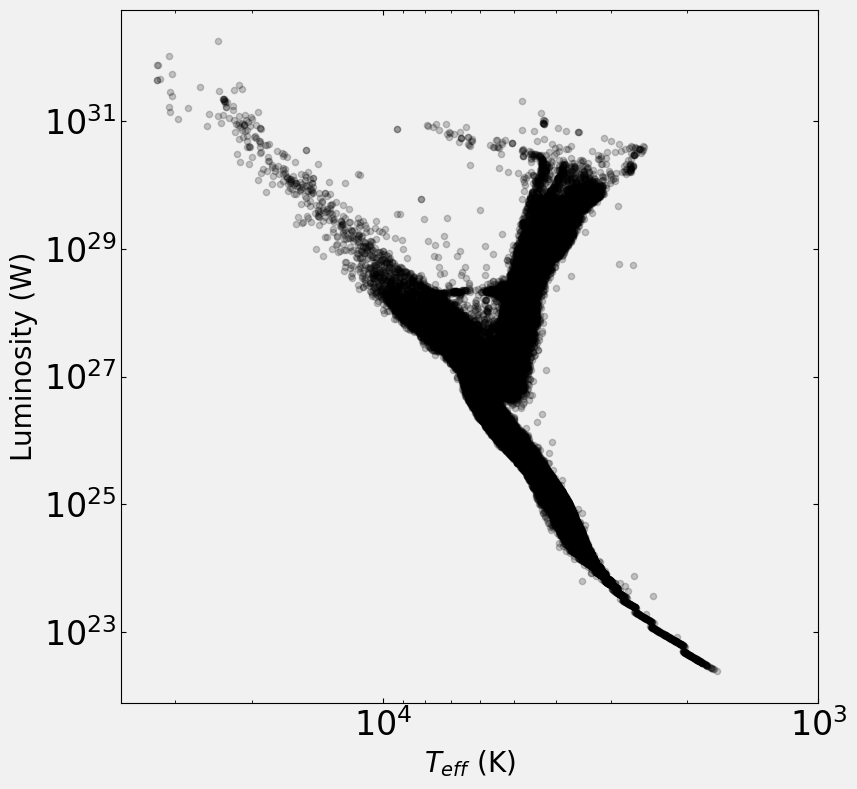

In [19]:
df.plot.scatter(x='k2_teff',y='k2_L',loglog=True,color='k',s=20,figsize=(9,9),alpha=0.2)
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');

In [21]:
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

In [22]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 3.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


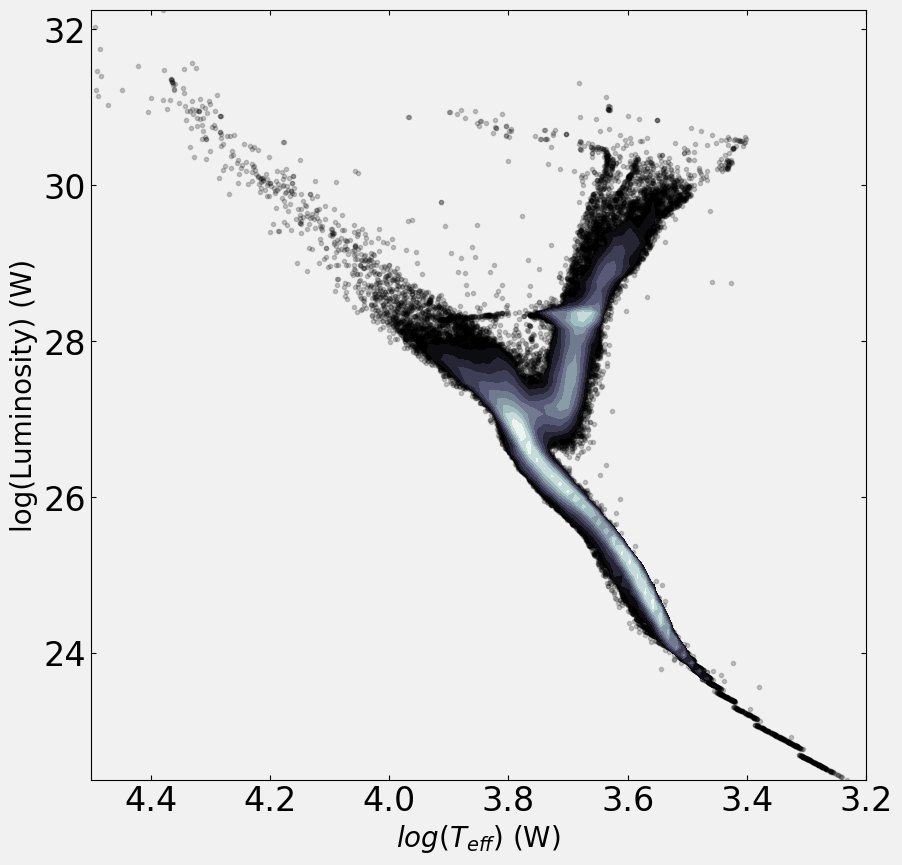

In [23]:
from astroML import plotting
ax=plt.figure(figsize(10,10)).add_subplot()
plotting.scatter_contour(np.log10(teff_na),np.log10(L_na),
                         threshold=50, log_counts=True,
                         histogram2d_args=dict(bins=(100,100)),filled_contour=True,
                                               plot_args=dict(marker='.',linestyle='none',color='black',alpha=0.2),
                                               contour_args=dict(alpha=1,cmap='bone'))
pl.ylabel('log(Luminosity) (W)')
pl.xlabel(r'$log(T_{eff})$ (W)')
pl.xlim(4.5,3.2)
pl.savefig('k2scatter_contour.png')

#by-hand version

In [25]:
H,xbins,ybins=np.histogram2d(np.log10(teff_na),np.log10(L_na),bins=(40,40))
Hsort=np.sort(H.flatten())

<ipython-input-26-3bdd64f0eb4b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])
<ipython-input-26-3bdd64f0eb4b>:29: UserWarning: linewidths is ignored by contourf
  axc = contourf(H.T, extent=extent, levels=levels,


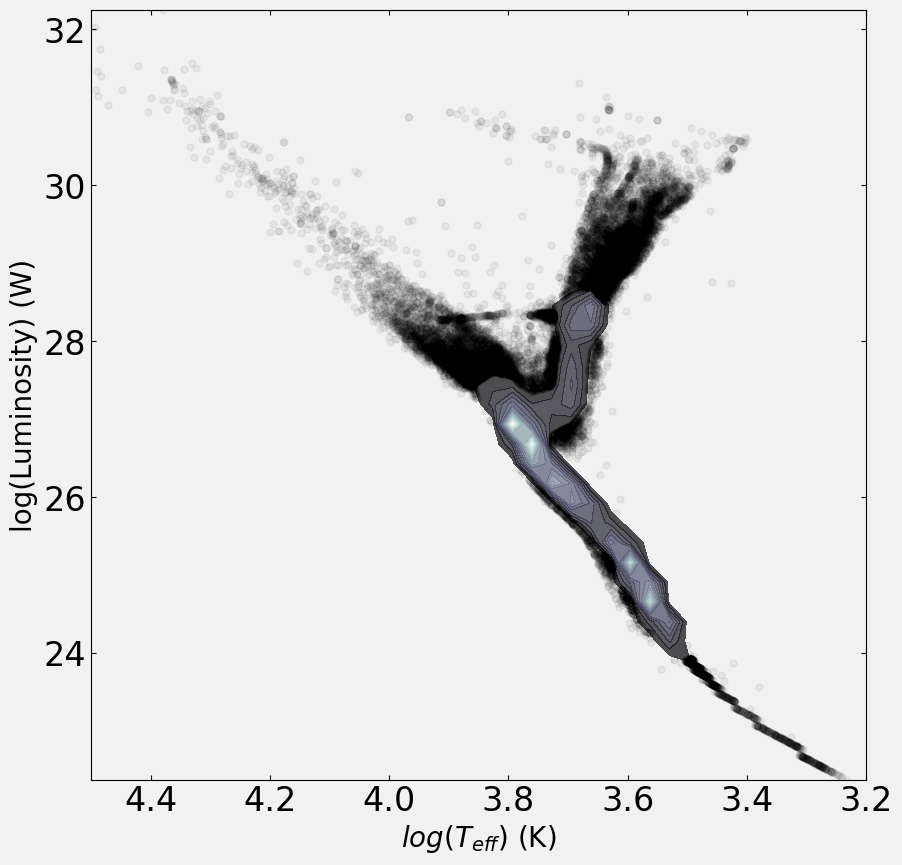

In [26]:
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
ax = pl.figure(figsize=(10,10)).add_subplot(111)
levels = np.linspace(H.max()/15, H.max(), 15)
i_min = np.argmin(levels)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

#contours = ax.contourf(H.T, levels, extent=extent, cmap='bone')
X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='bone', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');